# Programming Project Title Here

## Programming for Data Analysis Project 

### Andrew Walker - G00398788@gmit.ie

https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm

https://www.usga.org/content/dam/usga/pdf/RSI/distance-insights-2021-docs/2020%20Distance%20Report%2026-01-2021.pdf

https://www.usga.org/content/dam/usga/pdf/2020/distance-insights/DIPR-FINAL-2020-usga.pdf

https://www.pgatour.com/stats/stat.101.y2021.html

1990 (no major innovations between 1980 and 1990), 2000, 2010, 2020 - simulate data for 2030

Make a note of total number of players on Fedex

In [1]:
# Regular expressions.
import re

# Convenient HTTP requests.
import requests as rq

# Dates and times
import datetime as dt

# Data frames
import pandas as pd

# FOr downloading
import urllib.request as urlrq

#numpy
import numpy as np

# pyplot
import matplotlib.pyplot as plt

# seaborn
import seaborn as sns

import math

#insall fitter 
#https://pypi.org/project/fitter/

from scipy import stats
#https://stackoverflow.com/questions/16330831/most-efficient-way-to-find-mode-in-numpy-array
    
import scipy

rng = np.random.default_rng()

from fitter import get_common_distributions
get_common_distributions()
from fitter import Fitte





### Driving distance

https://www.pgatour.com/stats/stat.101.y2021.html

In [2]:
# Fetch the driving distance stats URL.
#resp = rq.get('https://www.pgatour.com/stats/stat.101.y2021.html')
# Have a look
#resp



In [3]:
# get the current date and time
#now = dt.datetime.now()

# format as a string
#nowstr = now.strftime('%Y%m%d_%H%M%S')

In [4]:
# Create a file path for the original data
#path = 'data/driving_stats_csv_' + nowstr + '.html'

#path

In [5]:
# Save the original html file
#with open(path, 'w') as f:
 #   f.write(resp.text)



In [6]:
# Compile the regular expression for matching lines
#re_course = re.compile(r'([A-Z]{2}[0-9]{3})(.*)')
#re_rank = re.compile(r'([0-9]{3})(.*)')



In [7]:
#re_rank


In [8]:


# File path for the csv file
#path = 'data/driving_stats_csv_' + nowstr + '.csv'



In [9]:
#path

In [10]:
df = pd.read_csv('data\strokes_gained.csv')
print(df.to_string()) 

    Fedex Rank 2021               Name  Driving distance (avg yds)  Driving accuracy (%)  Greens in Regulation (%)  Birdie average
0                 1    Patrick Cantlay                       302.8                 60.71                     70.16            4.29
1                 2           Jon Rahm                       309.0                 63.73                     71.93            4.51
2                 3           Kevin Na                       288.5                 66.56                     64.11            4.00
3                 4      Justin Thomas                       303.9                 55.72                     67.79            4.31
4                 5     Viktor Hovland                       302.2                 63.86                     68.61            4.40
5                 5  Xander Schauffele                       307.6                 58.83                     68.64            4.28
6                 7  Bryson DeChambeau                       323.7                 

In [11]:
df_arr = df
df_arr.columns = ['Fedex Rank 2021', 'Name', 'Driving distance (avg yds)','Driving accuracy (%)','Greens In Regulation (%)', 'Birdie average']
#https://note.nkmk.me/en/python-pandas-t-transpose/
df_arr

,Fedex Rank 2021,Name,Driving distance (avg yds),Driving accuracy (%),Greens In Regulation (%),Birdie average
0,1,Patrick Cantlay,302.8,60.71,70.16,4.29
1,2,Jon Rahm,309.0,63.73,71.93,4.51
2,3,Kevin Na,288.5,66.56,64.11,4.00
3,4,Justin Thomas,303.9,55.72,67.79,4.31
4,5,Viktor Hovland,302.2,63.86,68.61,4.40
...,...,...,...,...,...,...
95,96,Roger Sloan,295.8,61.78,68.77,3.79
96,97,Brandt Snedeker,286.6,64.04,64.48,3.73
97,98,Hank Lebioda,295.0,61.16,69.14,3.78
98,99,Tyler McCumber,309.4,58.30,64.71,3.57


In [12]:
distance = df_arr.iloc[:,2]


In [13]:
accuracy = df_arr.iloc[:,3]


In [14]:
accuracy_mode = stats.mode(accuracy)
#https://stackoverflow.com/questions/16330831/most-efficient-way-to-find-mode-in-numpy-array


In [15]:
accuracy_mean = accuracy.mean()
print(accuracy_mean)

61.361600000000024


In [16]:
gir = df_arr.iloc[:,4]


In [17]:
birdies = df_arr.iloc[:,5]


In [18]:
my_array = np.array([[distance],[accuracy],[gir],[birdies]])               
my_array

array([[[302.8 , 309.  , 288.5 , 303.9 , 302.2 , 307.6 , 323.7 , 312.9 ,
         294.7 , 290.4 , 296.7 , 305.5 , 307.9 , 319.3 , 297.8 , 309.4 ,
         297.9 , 299.4 , 305.3 , 299.5 , 297.1 , 295.4 , 305.3 , 305.  ,
         291.4 , 299.9 , 306.6 , 295.2 , 310.6 , 310.7 , 298.4 , 306.5 ,
         297.9 , 296.3 , 300.8 , 303.1 , 309.  , 289.1 , 300.2 , 292.5 ,
         291.7 , 293.8 , 297.5 , 300.7 , 299.6 , 294.9 , 304.  , 303.  ,
         300.6 , 294.1 , 303.  , 303.9 , 297.5 , 289.2 , 293.8 , 289.8 ,
         317.1 , 298.7 , 298.2 , 292.3 , 312.1 , 291.9 , 300.9 , 295.6 ,
         307.2 , 298.9 , 293.5 , 299.1 , 304.6 , 301.8 , 315.9 , 295.1 ,
         293.5 , 299.  , 295.9 , 292.3 , 285.2 , 289.9 , 299.9 , 292.2 ,
         304.6 , 283.8 , 292.9 , 311.6 , 288.6 , 290.5 , 314.6 , 299.5 ,
         302.9 , 306.  , 290.8 , 277.8 , 294.1 , 294.  , 286.8 , 295.8 ,
         286.6 , 295.  , 309.4 , 295.4 ]],

       [[ 60.71,  63.73,  66.56,  55.72,  63.86,  58.83,  54.18,  57.87,
       

In [19]:
df = pd.DataFrame(np.concatenate(my_array))
print(df)
print(type(df))

       0       1       2       3       4       5       6       7       8   \
0  302.80  309.00  288.50  303.90  302.20  307.60  323.70  312.90  294.70   
1   60.71   63.73   66.56   55.72   63.86   58.83   54.18   57.87   65.70   
2   70.16   71.93   64.11   67.79   68.61   68.64   67.15   66.67   66.47   
3    4.29    4.51    4.00    4.31    4.40    4.28    4.50    4.25    3.69   

       9   ...      90      91      92      93      94      95      96  \
0  290.40  ...  290.80  277.80  294.10  294.00  286.80  295.80  286.60   
1   71.05  ...   68.58   73.31   67.09   64.87   59.67   61.78   64.04   
2   69.27  ...   68.04   66.72   69.18   65.86   60.71   68.77   64.48   
3    4.20  ...    3.64    3.74    3.27    3.43    3.19    3.79    3.73   

       97      98      99  
0  295.00  309.40  295.40  
1   61.16   58.30   62.31  
2   69.14   64.71   64.01  
3    3.78    3.57    3.55  

[4 rows x 100 columns]
<class 'pandas.core.frame.DataFrame'>


In [20]:
df_t = df.T
df_t.columns = ['Driving distance (avg yds)','Driving accuracy (%)','Greens In Regulation (%)', 'Birdie average']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [21]:
df_t.head()

,Driving distance (avg yds),Driving accuracy (%),Greens In Regulation (%),Birdie average
0,302.8,60.71,70.16,4.29
1,309.0,63.73,71.93,4.51
2,288.5,66.56,64.11,4.00
3,303.9,55.72,67.79,4.31
4,302.2,63.86,68.61,4.40


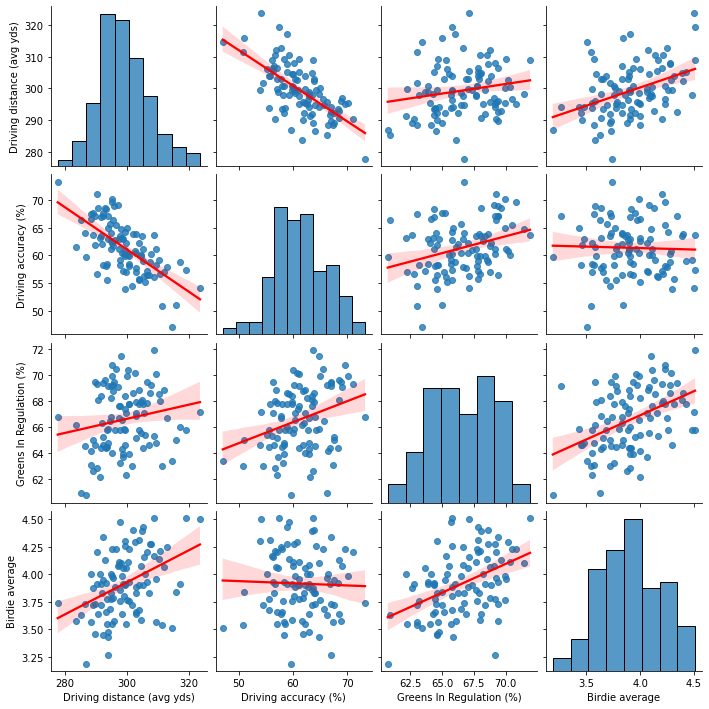

In [22]:
sns.pairplot(df_t, kind="reg", plot_kws={'line_kws':{'color':'red'}})

In [23]:
#from scipy import stats
#data = stats.gamma.rvs(2, loc=1.5, scale=2, size=10000)
#print(data)

In [24]:
fitdistance = np.array([distance])


,sumsquare_error,aic,bic,kl_div
lognorm,0.030668,880.478875,-795.155890,inf
gamma,0.030719,880.085594,-794.989700,inf
chi2,0.030719,880.086111,-794.989433,inf
rayleigh,0.031205,inf,-798.023366,inf
norm,0.031863,876.688442,-795.936826,inf


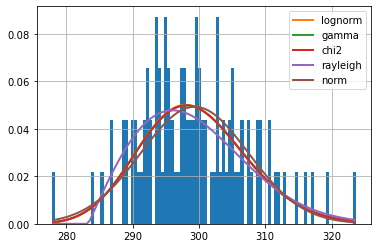

In [44]:
#https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9
#https://pypi.org/project/fitter/
#https://fitter.readthedocs.io/en/latest/faqs.html#what-are-the-distributions-available

f = Fitter(fitdistance, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [26]:
f.get_best(method = 'sumsquare_error')

{'lognorm': {'s': 0.11093697461805507,
  'loc': 226.62980940729665,
  'scale': 72.26386699032992}}

In [27]:
fitaccuracy = np.array([accuracy])

,sumsquare_error,aic,bic,kl_div
rayleigh,0.105932,inf,-675.802008,inf
chi2,0.106243,767.803146,-670.904406,inf
gamma,0.107194,765.701837,-670.012613,inf
lognorm,0.107210,765.942683,-669.997928,inf
norm,0.107583,762.150066,-674.255496,inf


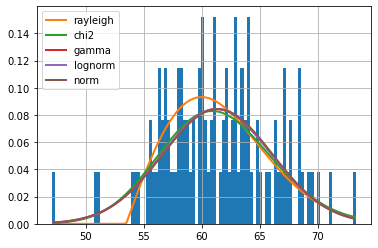

In [28]:
f = Fitter(fitaccuracy, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [29]:
al = f.get_best(method = 'sumsquare_error')
al


{'rayleigh': {'loc': 53.46421743761188, 'scale': 6.506613280990041}}

In [30]:
fitgir = np.array([gir])

,sumsquare_error,aic,bic,kl_div
norm,0.991301,543.663959,-452.180353,inf
lognorm,0.991801,545.907262,-447.524837,inf
gamma,0.991862,546.235757,-447.518615,inf
chi2,0.992806,548.067712,-447.423532,inf
rayleigh,1.002078,inf,-451.099131,inf


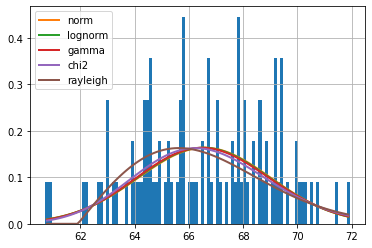

In [31]:
f = Fitter(fitgir, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [32]:
fitbirdies = np.array([birdies])

,sumsquare_error,aic,bic,kl_div
lognorm,68.248116,122.547073,-24.386525,inf
gamma,68.276475,122.224942,-24.344981,inf
norm,68.380487,119.275421,-28.797927,inf
rayleigh,68.518205,inf,-28.596730,inf
exponpow,69.435081,100.183424,-22.662285,inf


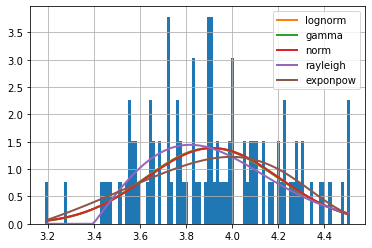

In [33]:
f = Fitter(fitbirdies, distributions=['cauchy',
 'chi2',
 'expon',
 'exponpow',
 'gamma',
 'lognorm',
 'norm',
 'powerlaw',
 'rayleigh',
 'uniform'])
f.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
f.summary()

In [34]:
df = pd.read_csv('data\driving_stats.csv')

print(df.to_string()) 

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe1 in position 2598: invalid continuation byte

Name
Driving distance avg (https://www.pgatour.com/content/pgatour/stats/stat.101.y2021.html)
Driving accuracy % (https://www.pgatour.com/content/pgatour/stats/stat.102.y2021.html)
GIR (https://www.pgatour.com/content/pgatour/stats/stat.103.y2021.eoff.t013.html)
Fedex Cup Regular Season Standings (https://www.pgatour.com/content/pgatour/stats/stat.02394.y2021.html)

In [ ]:
df_arr = df
df_arr.columns = ['Driving distance avg (yds)','Driving accuracy (%)','Scoring avg (%)','GIR']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [ ]:
df_arr

In [ ]:
# Write a function / loop to plot these histograms
# Investigate how to determine what their distribution is... Skilearn? 

In [ ]:
#distance2020 = df_arr.iloc[:,0]
#distance2020
x = df_arr.iloc[:,0]
x

In [ ]:
plt.hist(x)

In [ ]:
#accuracy2020 = df_arr.iloc[:,1]
#accuracy2020
y = df_arr.iloc[:,1]
y

In [ ]:
plt.hist(y)

In [ ]:
#plt.scatter(distance2020, accuracy2020)
#m, b = np.polyfit(distance2020, accuracy2020, 1)
#plt.plot(distance2020, m*distance2020 + b)
#plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

#plt.scatter(z,y)
#m, b = np.polyfit(z,y, 1)
#plt.plot(z, m*z + b)
#plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python



In [ ]:
z = df_arr.iloc[:,2]
z

In [ ]:
# make a note that low scoring is better
plt.hist(z)

In [ ]:
plt.scatter(y,z)

plt.show()

In [ ]:
plt.scatter(y,x)
plt.show()

In [ ]:
plt.scatter(y,x)
m, b = np.polyfit(y, x, 1)
plt.plot(y, m*y + b)
plt.show()

In [ ]:
zz = df_arr.iloc[:,3]
zz

In [ ]:
plt.hist(zz)

In [ ]:
plt.scatter(z,zz)

plt.show()

In [ ]:
my_array = np.array([[x],[y],[z],[zz]])
                    
my_array

In [ ]:
df = pd.DataFrame(np.concatenate(my_array))
print(df)
print(type(df))

In [ ]:
df_t = df.T
df_t.columns = ['Driving distance avg (yds)','Driving accuracy (%)','Scoring avg (%)','GIR']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [ ]:
df_t.head()

In [ ]:
sns.pairplot(df_t, kind="reg", plot_kws={'line_kws':{'color':'red'}})

### Distance

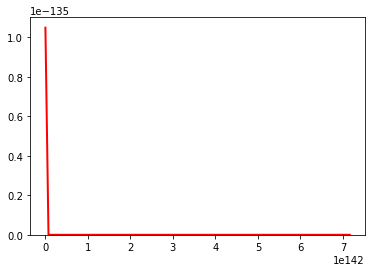

In [52]:
# Driving distacnce
#https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.lognormal.html#numpy.random.Generator.lognormal
mu, sigma = 316.5, 5.1

distance_rand = rng.lognormal(mu, sigma, 100)

count, bins, ignored = plt.hist(distance_rand, 100, density=True)

x = np.linspace(min(bins), max(bins), 100)

pdf = (np.exp(-(np.log(x) - mu)**2 / (2 * sigma**2))

       / (x * sigma * np.sqrt(2 * np.pi)))

plt.plot(x, pdf, linewidth=2, color='r')

plt.axis('tight')

plt.show()



### Accuracy

In [37]:
from scipy.stats import rayleigh

In [38]:
# https://www.kite.com/python/answers/how-to-convert-a-dictionary-to-a-numpy-array-in-python 
# use this to put the scale factor in
al_data = list(al.items())
al_array = np.array(al_data)
al_array

array([['rayleigh',
        {'loc': 53.46421743761188, 'scale': 6.506613280990041}]],
      dtype=object)

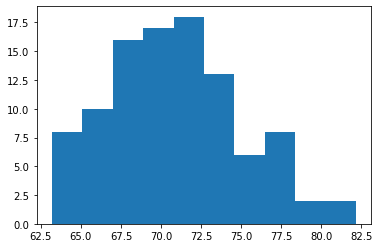

In [39]:
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rayleigh.html
accuracy_rand = rayleigh.rvs(loc=62.6, scale=6.319240523124456, size=100, random_state=None) # use the mean value determined for the loc and the scale is determined using fitter
plt.hist(accuracy_rand, bins=10)

plt.show()

In [ ]:
type(al)

### GIR

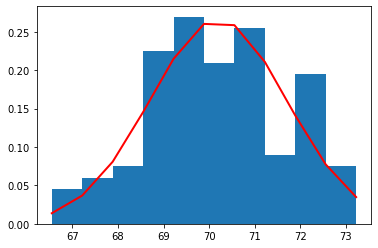

In [45]:
# GIR
mu, sigma = 70.2, 1.5

gir_rand = np.random.default_rng().normal(mu, sigma, 100)

count, bins, ignored = plt.hist(gir_rand, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

# https://www.statisticshowto.com/choose-bin-sizes-statistics/

In [ ]:
accuracy_mode

In [ ]:
plt.hist(accuracy)

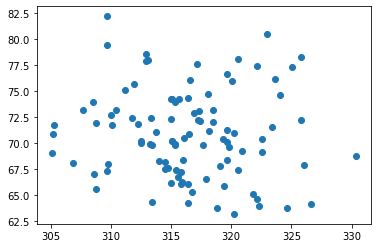

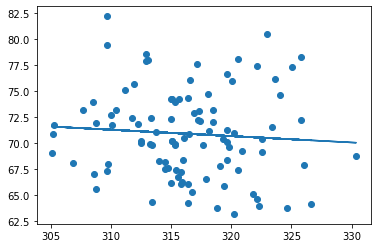

In [43]:
plt.scatter(distance_rand, accuracy_rand)
m, b = np.polyfit(distance_rand, accuracy_rand, 1)
plt.plot(distance_rand, m*distance_rand + b)
plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

In [ ]:
y

In [ ]:
y.max(), y.min(), len(y)


In [ ]:
plt.scatter(x,y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
plt.show()
#https://www.kite.com/python/answers/how-to-plot-a-linear-regression-line-on-a-scatter-plot-in-python

In [ ]:
mu, sigma = 69.4, 0.4

z = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(z, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

In [ ]:
mu, sigma = 70.2, 1.5

zz = np.random.default_rng().normal(mu, sigma, 1000)

count, bins, ignored = plt.hist(zz, 10, density=True)

plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *

               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),

         linewidth=2, color='r')

plt.show()

In [ ]:
my_array = np.array([[x],[y],[z],[zz]])
                    
my_array

In [ ]:
#irisData = pd.read_csv('bezdekIris.data', header = None)  
#irisData.columns = ['Sepal Length (cm)','Sepal Width (cm)','Petal Length (cm)','Petal Width (cm)','Class']

In [ ]:
df = pd.DataFrame(np.concatenate(my_array))


print(df)
print(type(df))

In [ ]:
df_t = df.T
df_t.columns = ['Driving distance avg (yds)','Driving accuracy (%)','Scoring avg (%)','GIR']
#https://note.nkmk.me/en/python-pandas-t-transpose/

In [ ]:
df_t.head()

In [ ]:
sns.pairplot(df_t, kind="reg", plot_kws={'line_kws':{'color':'red'}})
# https://stackoverflow.com/questions/50722972/change-the-regression-line-colour-of-seaborns-pairplot